# **Aula 06 - Processamento com Diversas Imagens**

In [ ]:
# !cp -r /content/drive/MyDrive/ Foto\ Colonia ./ (Caso tenha espaço)
!cp -r /content/drive/MyDrive/Colonia ./

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
import pandas as pd
import os
import glob
import seaborn as sns

In [ ]:
# Organizando uma lista de caminhos para acessar os "jpgs" da pasta "Colonia"
caminho = sorted(glob.glob(os.path.join(os.getcwd(), 'Colonia', '*.jpg')))

In [ ]:
print(caminho)

['/content/Colonia/Colonias (1).jpg', '/content/Colonia/Colonias (2).jpg', '/content/Colonia/Colonias (3).jpg']


In [ ]:
vetor = []

for img in caminho:
  imagem = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  linhas = imagem.shape[0]
  colunas = imagem.shape[1]
  data = (linhas, colunas)
  vetor.append(data)
  print(vetor)

[(1200, 1600)]
[(1200, 1600), (1200, 1600)]
[(1200, 1600), (1200, 1600), (1200, 1600)]


In [ ]:
vetor = []

for img in caminho:
  imagem = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  tamanho = imagem.shape
  limiar, imgLimiar = cv2.threshold(imagem, 100, 255, cv2.THRESH_BINARY)
  moments = cv2.moments(imgLimiar)
  huMoments = cv2.HuMoments(moments)
  import math
  for i in range(7):
    huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))
    data = huMoments
  vetor.append(data)
print(vetor)
matriz = np.concatenate(vetor, axis=1)
dataframe = pd.DataFrame(matriz)
print(dataframe)

[array([[  3.10181437],
       [  7.71156878],
       [ 10.30015886],
       [ 11.82274035],
       [ 23.54153775],
       [-18.00442322],
       [ 22.89497441]]), array([[  3.10181437],
       [  7.71156878],
       [ 10.30015886],
       [ 11.82274035],
       [ 23.54153775],
       [-18.00442322],
       [ 22.89497441]]), array([[  3.10181437],
       [  7.71156878],
       [ 10.30015886],
       [ 11.82274035],
       [ 23.54153775],
       [-18.00442322],
       [ 22.89497441]])]
           0          1          2
0   3.101814   3.101814   3.101814
1   7.711569   7.711569   7.711569
2  10.300159  10.300159  10.300159
3  11.822740  11.822740  11.822740
4  23.541538  23.541538  23.541538
5 -18.004423 -18.004423 -18.004423
6  22.894974  22.894974  22.894974


<ipython-input-6-3ebc8830bfbf>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))


# **Aula 07 - Detecção de Objetos Circulares**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data, filters, measure, morphology
from IPython.display import Image
from IPython.core.pylabtools import figsize
figsize(10, 10)

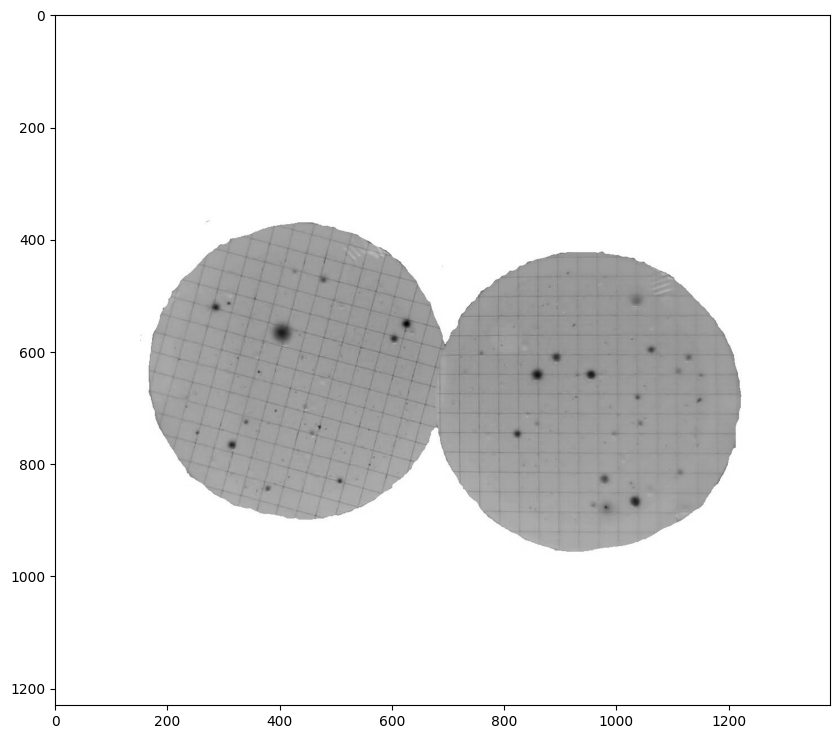

In [ ]:
imagem_cinza = cv2.imread('/content/drive/MyDrive/Faculdade/VisaoComputacional/BacteriasUFJF/ImagensManipuladas/DeteccaoCircular/Colonias04.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagem_cinza, cmap="gray")

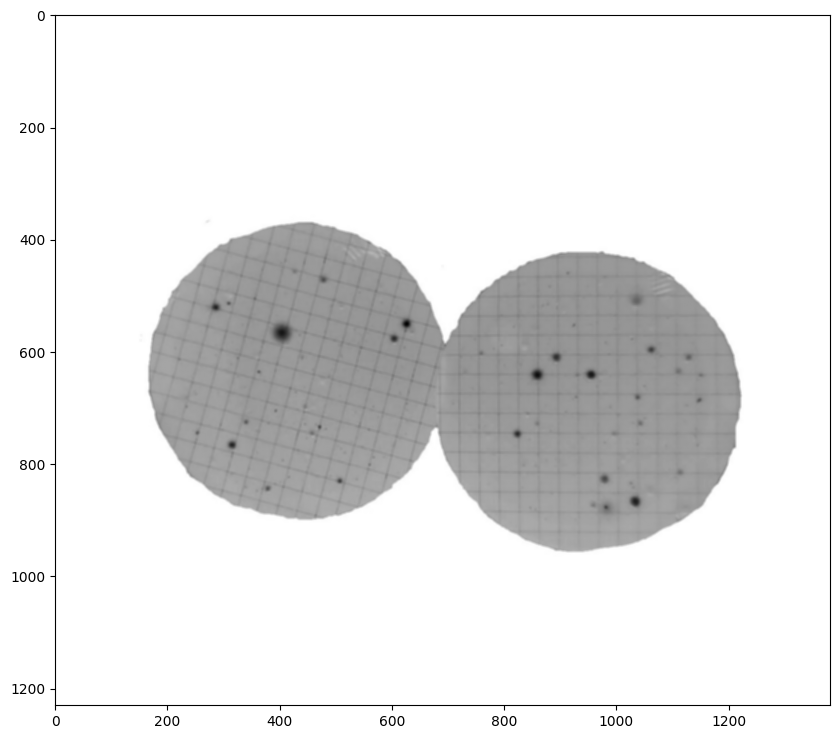

In [ ]:
imagem_filtrada = cv2.blur(imagem_cinza, (5, 5))
plt.imshow(imagem_filtrada, cmap='gray')

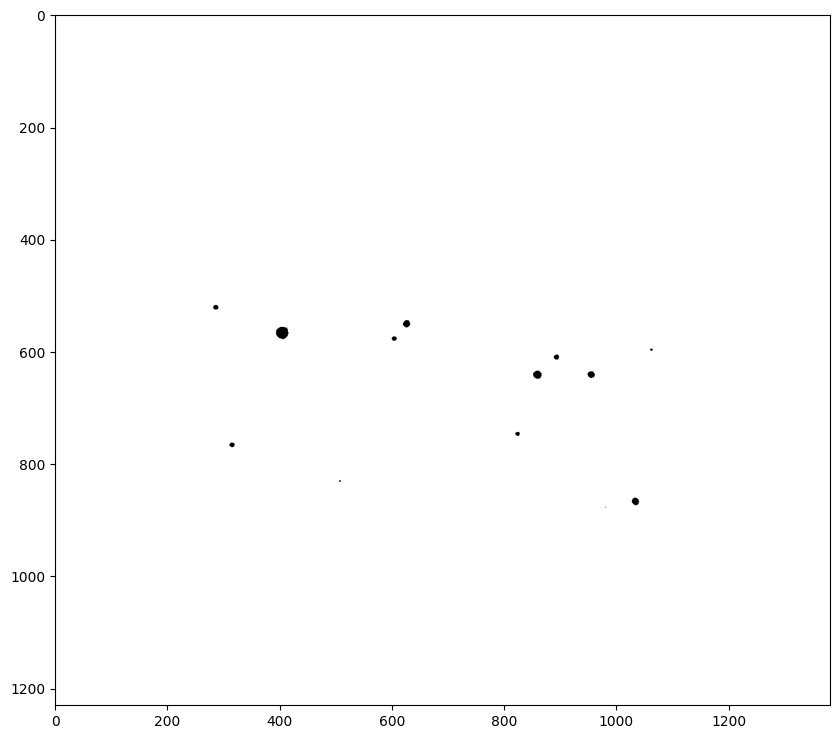

In [ ]:
limiar, imagem_binarizada = cv2.threshold(imagem_filtrada, 90, 255, cv2.THRESH_BINARY)
plt.imshow(imagem_binarizada, cmap='gray')

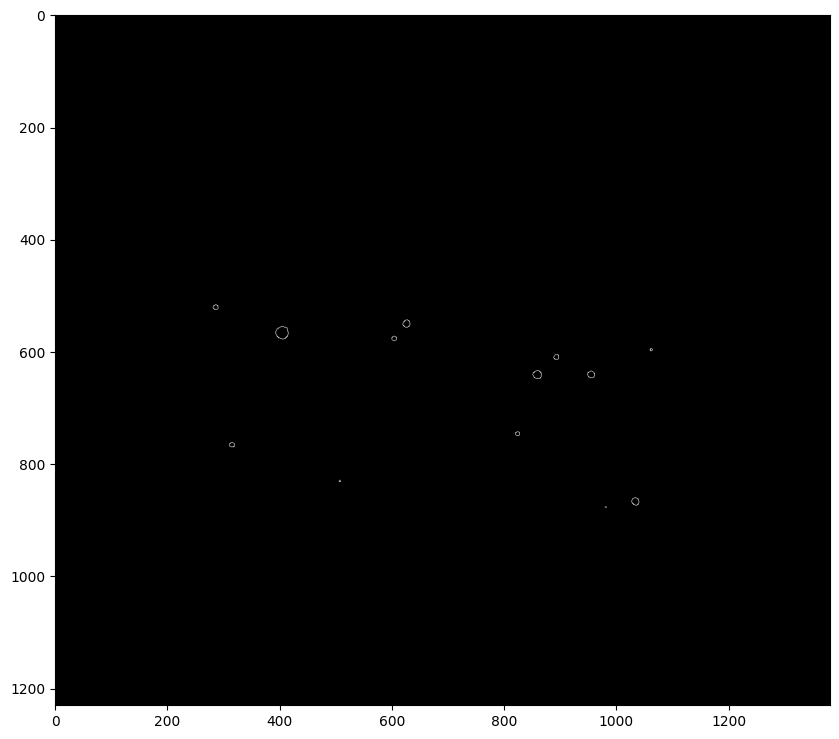

In [ ]:
imagem_canny = cv2.Canny(imagem_binarizada, 150, 200)
plt.imshow(imagem_canny, cmap='gray')

In [ ]:
# Detectando círculos
circles = cv2.HoughCircles(imagem_binarizada, cv2.HOUGH_GRADIENT, 2, 30, param1=100, param2=1, minRadius=10, maxRadius=15)

13


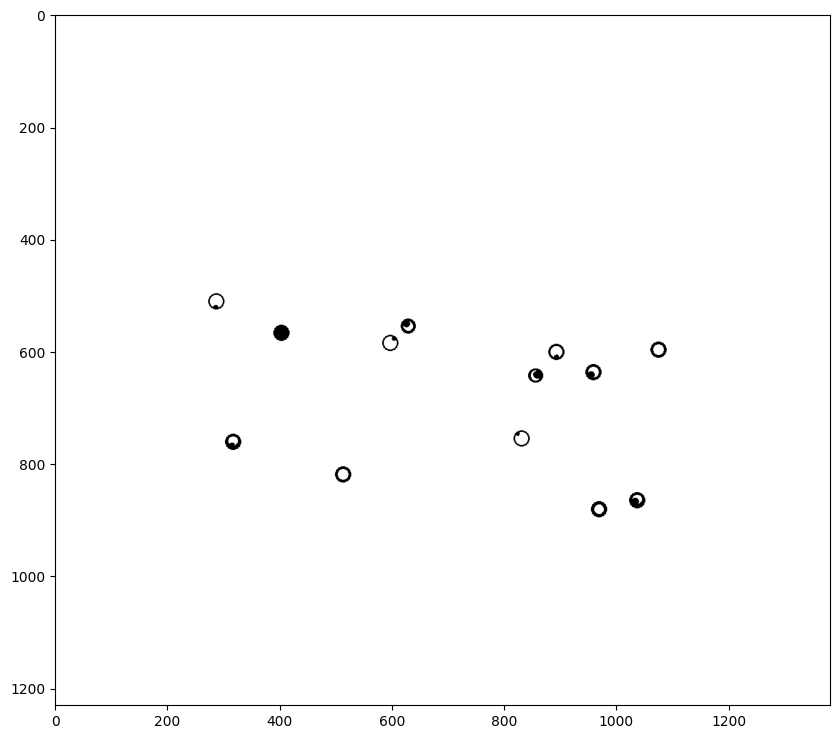

In [ ]:
if circles is not None:
    circles = circles[0]
    cont = 0
    for circle in circles:
        x, y, r = map(int, circle)
        centro = (x, y)
        cv2.circle(imagem_binarizada, centro, r, (0, 0, 255), 2)  # Desenhar círculos
        cont = cont + 1
    print(cont)
    plt.imshow(imagem_binarizada, cmap='gray')  # Exibir a imagem resultante
    plt.show()
else:
    print("Nenhuma bactéria detectada!")

# **Aula 08 - Machine Learning**

In [ ]:
!cp -r /content/drive/MyDrive/Faculdade/VisaoComputacional/Aulas/ImagensCortadas ./

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
import pandas as pd
import os
import glob
import seaborn as sns

In [ ]:
# Organizando uma lista de caminhos para acessar os "jpgs" da pasta "Colonia"
caminho = sorted(glob.glob(os.path.join(os.getcwd(), 'ImagensCortadas', '*.jpg')))

In [ ]:
print(caminho)

['/content/ImagensCortadas/Alecrim (1).jpg', '/content/ImagensCortadas/Alecrim (10).jpg', '/content/ImagensCortadas/Alecrim (11).jpg', '/content/ImagensCortadas/Alecrim (12).jpg', '/content/ImagensCortadas/Alecrim (13).jpg', '/content/ImagensCortadas/Alecrim (14).jpg', '/content/ImagensCortadas/Alecrim (15).jpg', '/content/ImagensCortadas/Alecrim (16).jpg', '/content/ImagensCortadas/Alecrim (17).jpg', '/content/ImagensCortadas/Alecrim (18).jpg', '/content/ImagensCortadas/Alecrim (19).jpg', '/content/ImagensCortadas/Alecrim (2).jpg', '/content/ImagensCortadas/Alecrim (20).jpg', '/content/ImagensCortadas/Alecrim (3).jpg', '/content/ImagensCortadas/Alecrim (4).jpg', '/content/ImagensCortadas/Alecrim (5).jpg', '/content/ImagensCortadas/Alecrim (6).jpg', '/content/ImagensCortadas/Alecrim (7).jpg', '/content/ImagensCortadas/Alecrim (8).jpg', '/content/ImagensCortadas/Alecrim (9).jpg', '/content/ImagensCortadas/Erva Cidreira (1).jpg', '/content/ImagensCortadas/Erva Cidreira (10).jpg', '/conte

In [ ]:
# Calculando os Momentos de Hu para descrever as formas do objeto
vetor = []

for img in caminho:
  imagem = cv2.imread(img, cv2.IMREAD_GRAYSCALE) # Lendo a imagem em tons de cinza
  tamanho = imagem.shape # Adquirindo o tamanho da imagem a partir do número de linhas e colunas
  limiar, imgLimiar = cv2.threshold(imagem, 100, 255, cv2.THRESH_BINARY)  # Aplicando binarização para realçar as formas
  moments = cv2.moments(imgLimiar) # Calculando os momentos da imagem para descrever características geométricas
  huMoments = cv2.HuMoments(moments) # Calculando os Momentos de Hu os quais descrevem a forma da imagem
  import math
  for i in range(7):
    huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i])) # Normalizando os Momentos de Hu
    data = huMoments
  vetor.append(data) # Armazenando os Momentos de Hu no vetor
print(vetor)
matriz = np.concatenate(vetor, axis=1) # Concatenando as características em uma matriz de eixo único

print(np.shape(matriz))
#print(matriz)
a=[np.zeros(20)]
b=[np.ones(20)]
c=[np.ones(20) * 2]
d=[np.ones(20) * 3]
T1 = np.concatenate((a,b), axis=1)
T2 = np.concatenate((c,d), axis=1)
T = np.concatenate((T1,T2), axis=1)
print(T)
matriz1 = np.concatenate((matriz,T), axis=0)
df = pd.DataFrame(matriz1)
print(df)

<ipython-input-92-88e1dbbd48bc>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i])) # Normalizando os Momentos de Hu


[array([[  3.15014388],
       [  9.85049765],
       [ 14.47701657],
       [ 13.52504813],
       [-27.52811859],
       [-18.46098149],
       [ 28.54086239]]), array([[  3.14448471],
       [  9.59044352],
       [ 14.01423769],
       [ 13.44638579],
       [-27.2852869 ],
       [-18.65430656],
       [-27.37921781]]), array([[  3.14474413],
       [  9.6087618 ],
       [ 14.18680977],
       [ 13.52029154],
       [-27.42742767],
       [-18.64497876],
       [-27.70393788]]), array([[  3.12474134],
       [  9.02415588],
       [ 12.82639392],
       [ 12.42520217],
       [-25.07365132],
       [-16.9372812 ],
       [-25.55305975]]), array([[  3.12661391],
       [  9.12881275],
       [ 12.94669817],
       [ 12.49278641],
       [-25.21623558],
       [-17.0620131 ],
       [-26.09825265]]), array([[  3.12226695],
       [  8.98651531],
       [ 13.01871451],
       [ 12.33479167],
       [-25.21420075],
       [-16.91450908],
       [-25.12004613]]), array([[  3.13897427]

In [ ]:
df.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
75,float64
76,float64
77,float64
78,float64


Redes Neurais

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Separando dados de entrada (X) e dados de saída (Y)
df = df.values
X = df[0:7, 0:].astype(float)
X = np.transpose(X)
Y = df[7, 0:].astype(float)
print(X.shape)
print(Y.shape)
print(X)
print(Y)

(80, 7)
(80,)
[[  3.15014388   9.85049765  14.47701657  13.52504813 -27.52811859
  -18.46098149  28.54086239]
 [  3.14448471   9.59044352  14.01423769  13.44638579 -27.2852869
  -18.65430656 -27.37921781]
 [  3.14474413   9.6087618   14.18680977  13.52029154 -27.42742767
  -18.64497876 -27.70393788]
 [  3.12474134   9.02415588  12.82639392  12.42520217 -25.07365132
  -16.9372812  -25.55305975]
 [  3.12661391   9.12881275  12.94669817  12.49278641 -25.21623558
  -17.0620131  -26.09825265]
 [  3.12226695   8.98651531  13.01871451  12.33479167 -25.21420075
  -16.91450908 -25.12004613]
 [  3.13897427   9.47475793  13.52221025  13.31145519 -26.79452917
  -18.16260016 -27.01838013]
 [  3.13828582   9.33261717  13.17006514  13.08961628 -26.24935248
  -17.80063213 -26.66480757]
 [  3.13947081   9.40166794  13.44872699  13.23757636 -26.59693388
  -17.94160111  27.15232177]
 [  3.13952302   9.4438766   13.56590646  13.31233917 -26.76180797
  -18.03520463  27.41760586]
 [  3.13292339   8.89001289

In [ ]:
# Separa os dados em treinamento e teste
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(56, 7)
(24, 7)
(56,)
(24,)


In [ ]:
# Modelo de classificação
model=MLPClassifier(activation='relu', hidden_layer_sizes=(10), random_state=0, max_iter=20000, verbose=True)

In [ ]:
# Roda o modelo com os dados de treinamento
model.fit(X_train, Y_train)

Iteration 1, loss = 13.96162671
Iteration 2, loss = 13.77163120
Iteration 3, loss = 13.58660764
Iteration 4, loss = 13.39826781
Iteration 5, loss = 13.20465542
Iteration 6, loss = 13.01432273
Iteration 7, loss = 12.83159417
Iteration 8, loss = 12.65513909
Iteration 9, loss = 12.48387336
Iteration 10, loss = 12.31682212
Iteration 11, loss = 12.15290256
Iteration 12, loss = 11.99121576
Iteration 13, loss = 11.83108688
Iteration 14, loss = 11.67203370
Iteration 15, loss = 11.51371973
Iteration 16, loss = 11.35591416
Iteration 17, loss = 11.19846225
Iteration 18, loss = 11.04126460
Iteration 19, loss = 10.88232560
Iteration 20, loss = 10.70853400
Iteration 21, loss = 10.52878356
Iteration 22, loss = 10.34887701
Iteration 23, loss = 10.15744353
Iteration 24, loss = 9.94614288
Iteration 25, loss = 9.71799987
Iteration 26, loss = 9.49016256
Iteration 27, loss = 9.26262269
Iteration 28, loss = 9.03537068
Iteration 29, loss = 8.80839633
Iteration 30, loss = 8.58169052
Iteration 31, loss = 8.355

MLPClassifier(hidden_layer_sizes=10, max_iter=20000, random_state=0,
              verbose=True)

In [ ]:
# Predição
prediction=model.predict(X_test)
print(prediction)

[2. 1. 1. 3. 2. 3. 3. 3. 2. 0. 2. 3. 0. 3. 2. 1. 0. 1. 0. 1. 2. 1. 2. 3.]


In [ ]:
from sklearn import metrics
val=metrics.accuracy_score(Y_test, prediction)
print(val)

0.9583333333333334
